<a href="https://colab.research.google.com/github/SophiaTangHart/Climate-Change/blob/main/WiDS23_datathon_STH_SWE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sophia Tang Hart and Sarah White Eagle
# Climate Change
## Kaggle Competition hosted by Women in Data Science (WiDS) Datathon 2023
(https://www.kaggle.com/competitions/widsdatathon2023)
### Use data science to improve long-range weather forecasts to help people prepare and adapt to extreme weather events caused by climate change.

### Implemented LightGBM, XGBoost, RandomForestRegressor, and ARIMA models, also used PCA to reduce feature dimension with 600MB training data (400,000 rows) including data drift resulting in top 57% on Kaggle Leaderboard position.

## March 2023


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

In [ ]:
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

train.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

# Exploratory Data Analysis

In [ ]:
# Finding target feature
target = [c for c in train.columns if c not in test.columns][0]
target

'contest-tmp2m-14d__tmp2m'

In [ ]:
print(train[target].shape)
print(train.shape)

(375734,)
(375734, 246)


In [ ]:
train[target].describe()

count    375734.000000
mean         11.858568
std           9.867901
min         -20.358963
25%           4.818231
50%          12.285770
75%          19.441170
max          37.238782
Name: contest-tmp2m-14d__tmp2m, dtype: float64

<AxesSubplot:>

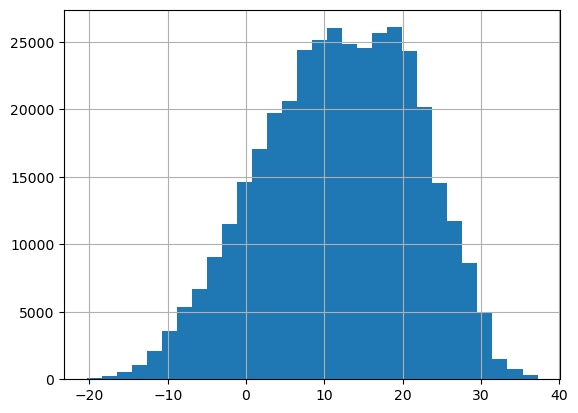

In [ ]:
train[target].hist(bins=30)

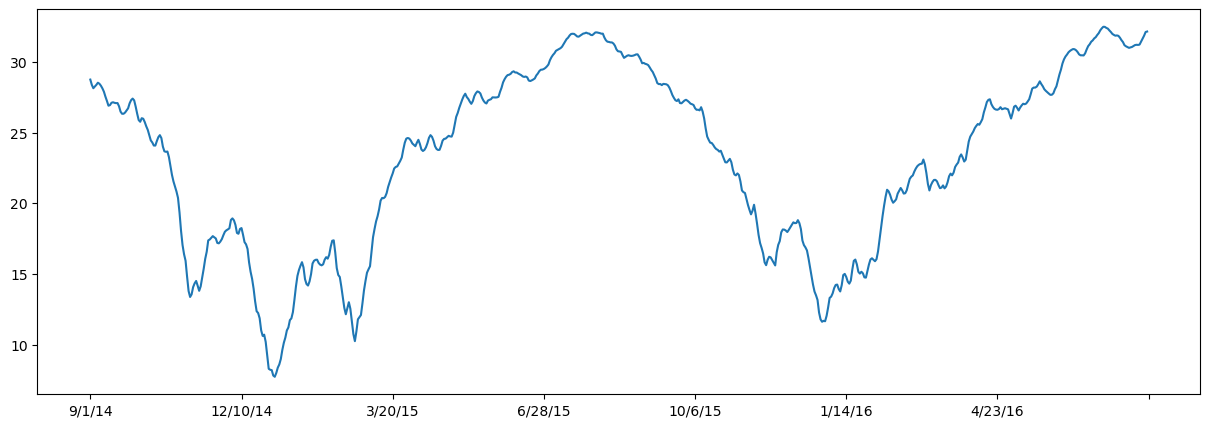

In [ ]:
import matplotlib.ticker as ticker

# Plotting a partial (2 years) of temperature profile

tick_spacing = 100

fig, ax = plt.subplots(1,1, figsize=(15, 5))
ax.plot(train.startdate[:700], train[target][:700])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

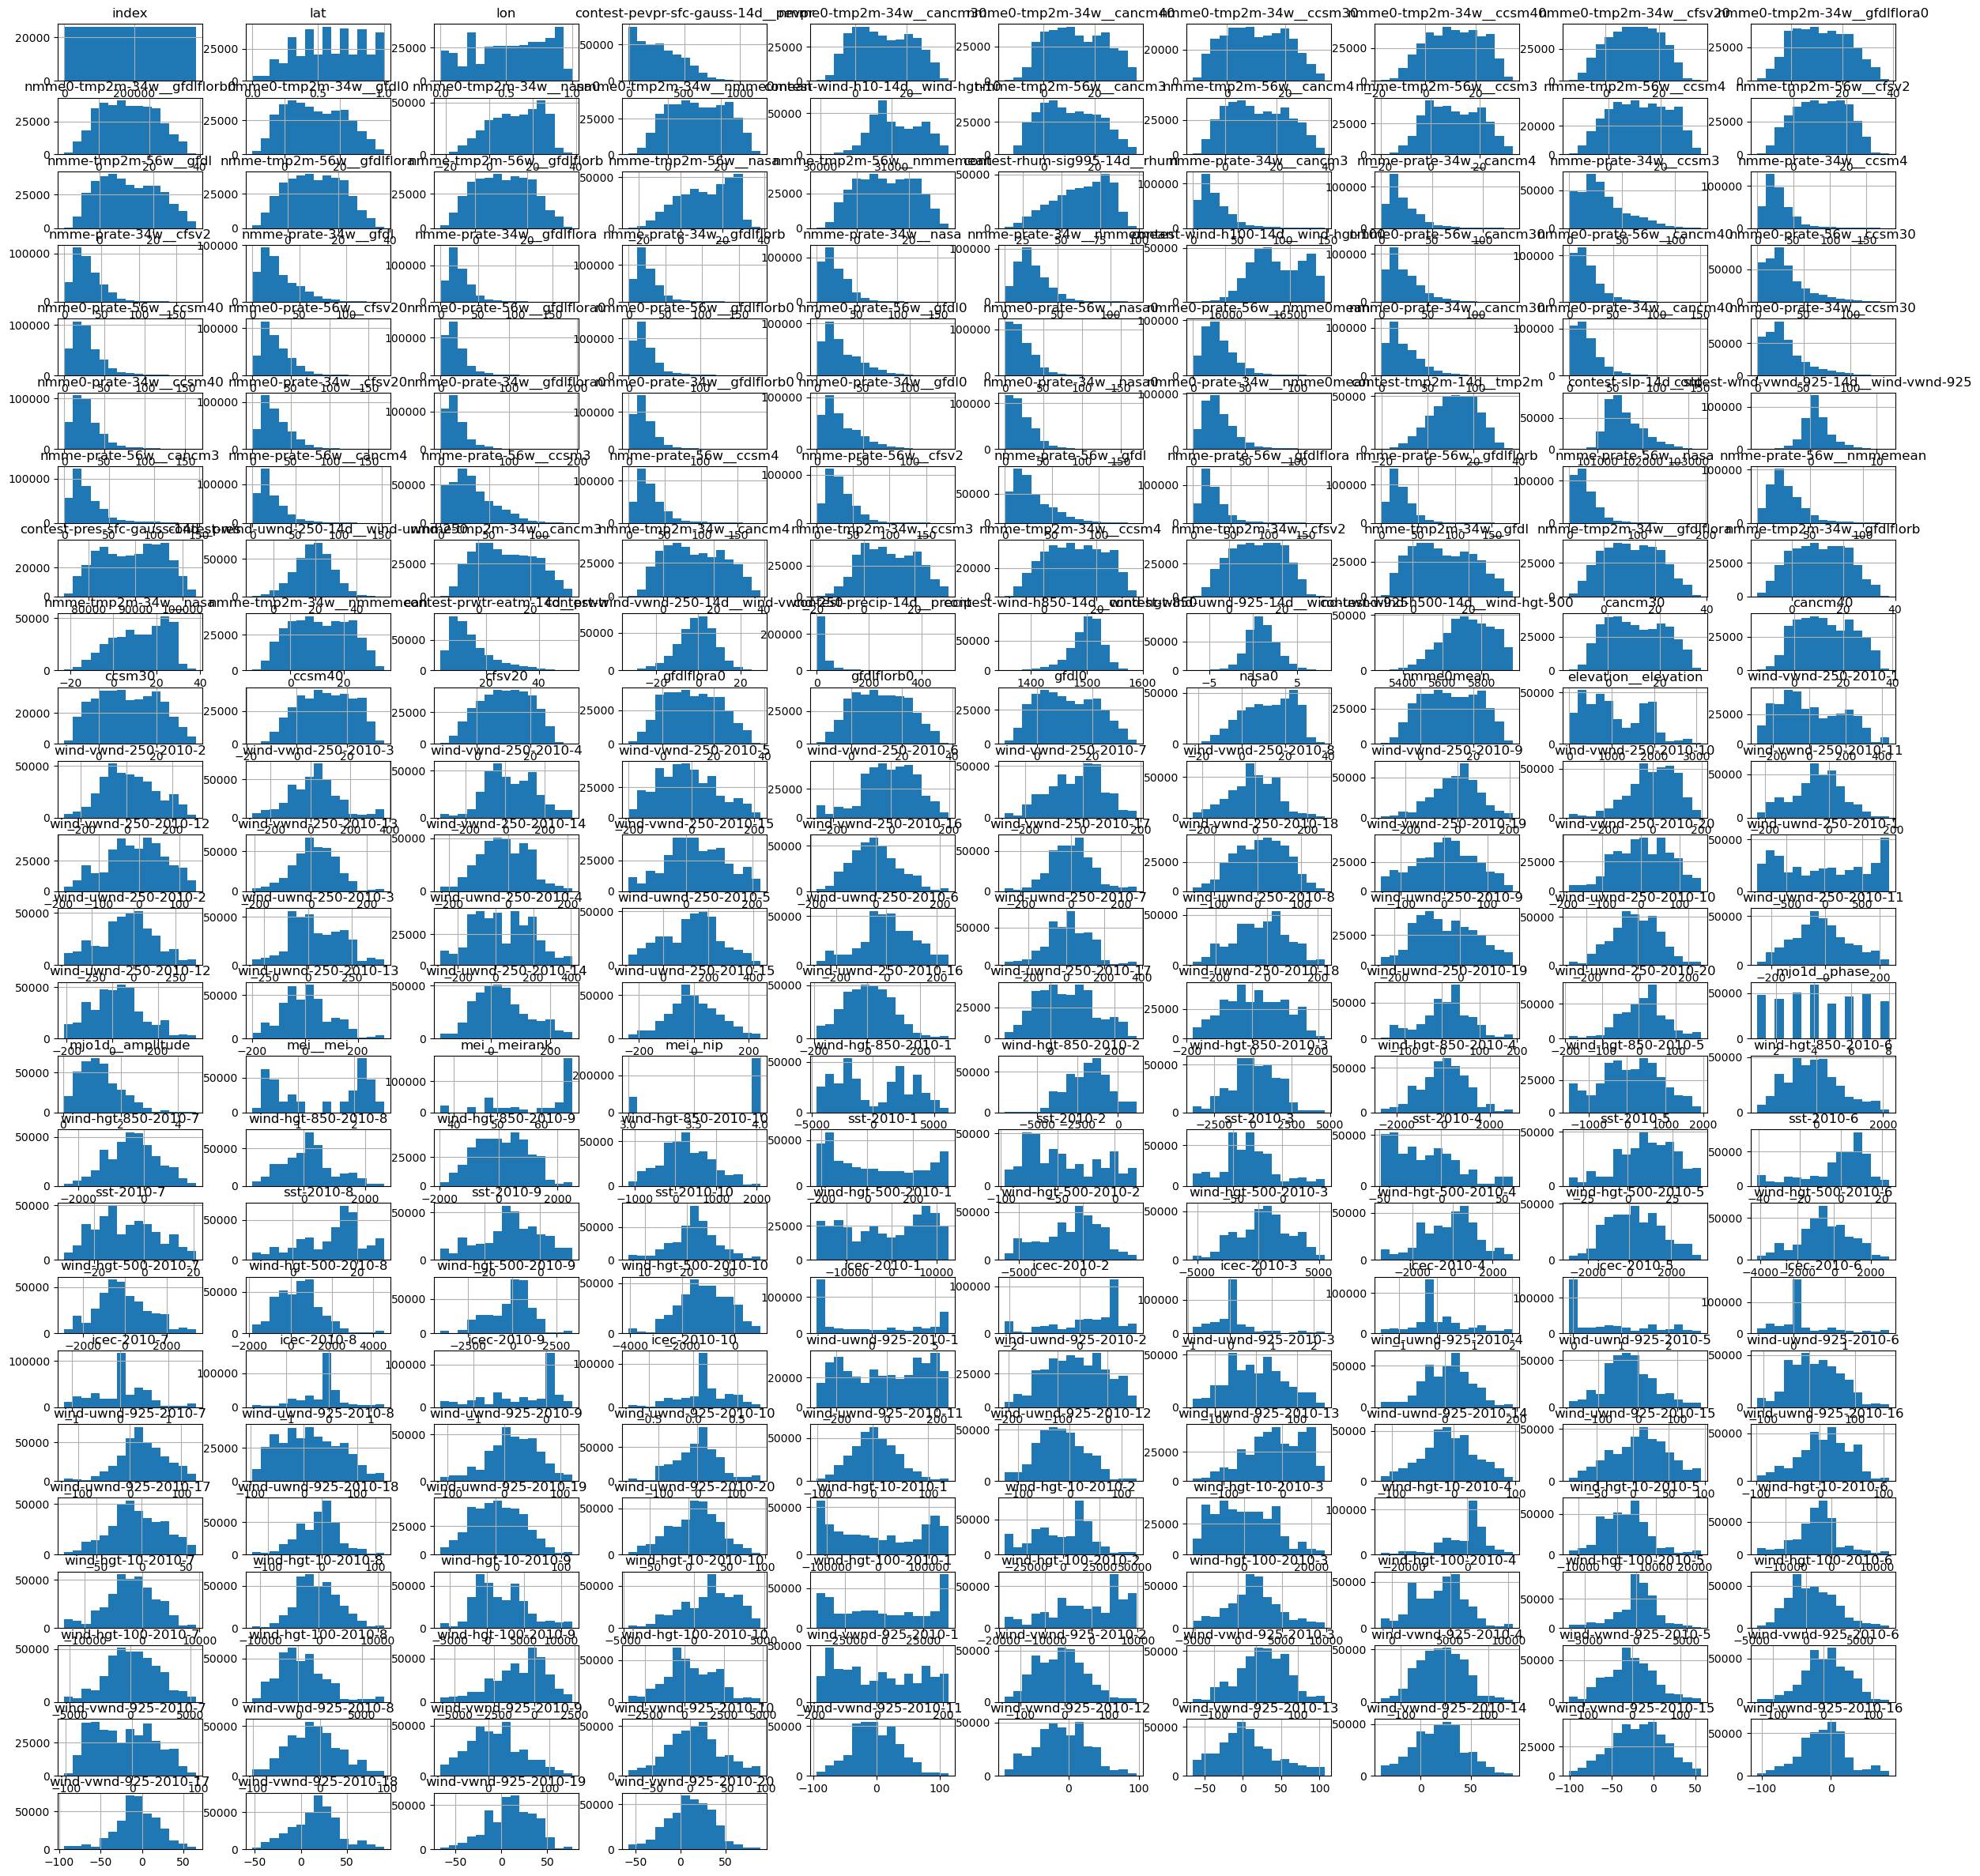

In [ ]:
train.hist(bins=15, figsize=(30, 30), layout=(25, 10))
plt.show()

# Multvariate Time Series Analysis - Vector Autoregression (VAR).

References:

https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

https://towardsdatascience.com/multi-step-time-series-forecasting-with-arima-lightgbm-and-prophet-cc9e3f95dfb0

https://builtin.com/data-science/time-series-python

https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://www.projectpro.io/article/how-to-build-arima-model-in-python/544

https://www.section.io/engineering-education/multivariate-time-series-using-auto-arima/

### Fill missing value with forward fill

In [ ]:
# total missing values
print('total missing value before fill:', train.isnull().sum().sum())

total missing value before fill: 101772


In [ ]:
# Forward fill missing values
#train = train.ffill()

#### Insights: I tested both dropna(), ffill(), and fill with mean. Dropna gave best results, probably because forward fill and fill with mean are not a good estimate of the actual values. So it's better to drop those rows.

In [ ]:
train = train.dropna()

In [ ]:
print('total missing value after dropna:', train.isnull().sum().sum())

total missing value after dropna: 0


In [ ]:
train.shape

(352604, 246)

In [ ]:
train['startdate'] = pd.to_datetime(train.startdate , format = '%m/%d/%y')
train = train.drop(['index'], axis=1)
train.index = train.startdate

In [ ]:
print(train.shape)
train.head()

(352604, 245)


,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,win

# Split data for training and validation sets

In [ ]:
split_ratio = 0.9
split_here = int(np.floor(split_ratio * train.shape[0]))

# When I evaluate the model, I used part of the data for training (train[0: split_here]).
# When I finally train the model for submission, I use the entire training data because I need to entire dataset 
# to represent all the longitude and latitude for all location groups.

#train_reduce = train[0 : split_here]
train_reduce = train
val = train[split_here :]

train_reduce = pd.DataFrame(train_reduce)
val = pd.DataFrame(val)

print(train_reduce.shape)
print(val.shape)

train_reduce.head()

(352604, 245)
(35261, 245)


,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,win

# Feature Engineering

Code Reference:
https://github.com/michevan/WIDS-Google/blob/main/notebooks/wids_datathon_2023_code_demo.ipynb

### Convert climateregions__climateregion from string to group using label encoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(train_reduce['climateregions__climateregion'])

# Use the same le to transform train and val sets
train_reduce['climateregions__climateregion'] = le.transform(train_reduce['climateregions__climateregion'])
val['climateregions__climateregion'] = le.transform(val['climateregions__climateregion'])

In [ ]:
print('Training set: ', train_reduce['climateregions__climateregion'].unique())
print('Validation set: ', val['climateregions__climateregion'].unique())

Training set:  [ 0  4  1  3  2  6  7  5  9 12 10  8 11 13 14]
Validation set:  [ 7  5 12 11  9 10  1]


### Map each lat and lon combination into a location group

In [ ]:
train_reduce['loc_group'] = train_reduce.groupby(['lat', 'lon']).ngroup()
train_reduce['loc_group'].nunique()

514

#### Important: The following assigns loc_group to validation data base on its lat and lon. Assignment must be the same as for the training data. The same process for test data.
Reference: https://github.com/michevan/WIDS-Google/blob/main/notebooks/wids_datathon_2023_code_demo.ipynb

In [ ]:
loc_temp = train_reduce.groupby(['lat', 'lon']).mean()['loc_group'].reset_index()

In [ ]:
regions_dict = {}

for row in loc_temp.iterrows():
    key = str(row[1].lat) + '_' + str(row[1].lon)
    regions_dict[key] = row[1].loc_group
    
val['regions_key'] = val.apply(lambda x: str(x.lat) + '_' + str(x.lon),
                                axis=1)
val['loc_group'] = val.regions_key.apply(lambda x: regions_dict.get(x, -1))

### Convert startdate to year, day of the year, month, and season as new variables

Reference to https://colab.research.google.com/drive/10r73mOp1R7cORfeuP97V65a-rgwGyfWr?usp=sharing

In [ ]:
def build_date_features(df):
    df.startdate = pd.to_datetime(df.startdate)
    df['year'] = df.startdate.dt.year
    df['day_of_year'] = df.startdate.dt.day_of_year
    df['month'] = df.startdate.dt.month

build_date_features(train_reduce)
build_date_features(val)

In [ ]:
def add_season(df):
    month_to_season = {
        1: 0,
        2: 0,
        3: 1,
        4: 1,
        5: 1,
        6: 2,
        7: 2,
        8: 2, 
        9: 3, 
        10: 3,
        11: 3,
        12: 0       
    }
    df['season'] = df['month'].apply([lambda x: month_to_season[x]])

add_season(train_reduce)
add_season(val)

### Since time is cyclical. Let's use sin and cos to prepresent time

In [ ]:
from sklearn.preprocessing import FunctionTransformer

def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x/period * 2 * np.pi))

def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x/period * 2 * np.pi))

def encode_cyclical(df):
    # day_of_year has period of 365
    df['day_of_year_sin'] = sin_transformer(365).fit_transform(df['day_of_year'])
    df['day_of_year_cos'] = cos_transformer(365).fit_transform(df['day_of_year'])
    
    # month has a period of 12
    df['month_sin'] = sin_transformer(12).fit_transform(df['month'])
    df['month_cos'] = cos_transformer(12).fit_transform(df['month'])
    
    # season has a period of 4
    df['season_sin'] = sin_transformer(4).fit_transform(df['season'])
    df['season_cos'] = cos_transformer(4).fit_transform(df['season'])
    
encode_cyclical(train_reduce)
encode_cyclical(val)

In [ ]:
val.head()

,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,win

### Convert datetime data type back to numeric, so it's compatible for standardization

In [ ]:
def conv_numeric(df, l):
    for i in l:
        df[i] = pd.to_numeric(pd.to_datetime(df[i]))
        
conv_numeric(train_reduce, ['year', 'day_of_year', 'month', 'season'])
conv_numeric(val, ['year', 'day_of_year', 'month', 'season'])

In [ ]:
train_reduce.head()

,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,win

### Separate X and y

In [ ]:
train_reduce = train_reduce.drop(columns = ['startdate'])
y_train = train_reduce[target]
X_train = train_reduce.drop(columns = target)

val = val.drop(columns = ['startdate', 'regions_key'])
y_val = val[target]
X_val = val.drop(columns = target)

# Principal Component Analysis (PCA)
### To reduce dimension (i.e. number of features)

Reference: https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad

In [ ]:
from sklearn.decomposition import PCA

pca =PCA(0.999999) # Capture % of the variance

pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.9999999, random_state=None)

PCA(n_components=0.9999999)

In [ ]:
pca.n_components_ # Number of components used for the model

70

In [ ]:
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)

# 
# Modeling

In [ ]:
### allow for view of all df columns
pd.set_option('display.max_columns', None)

## 1. RandomForestRegressor

In [ ]:

#from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor


# pipeline = Pipeline(steps = [
#    ('scaler', StandardScaler),
#    ('regressor', RandomForestRegressor())
#])


rf_model = RandomForestRegressor()
rf_model = rf_model.fit(X_train_std, y_train)


/tmp/ipykernel_6155/2652531688.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = rf_model.fit(X_train_std, y_train)


In [ ]:

from sklearn.metrics import mean_squared_error
import math

rf_train_pred = rf_model.predict(X_train_std)
rf_val_pred = rf_model.predict(X_val_std)

print(f'Training RMSE: {math.sqrt(mean_squared_error(rf_train_pred, y_train))}')
print(f'Validation RMSE: {math.sqrt(mean_squared_error(rf_val_pred, y_val))}')


/home/shart/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Training RMSE: 0.1288573556260656
Validation RMSE: 0.1425735919047174


### Insights: The RMSE is so low because there is too much overfit. When I previous evaluate the model, I didn't overlap training and validation sets. I used the entire data for training for the submission simulation, but validation is not nessary for submission. Also, I have to use the entire training set for the submission, because otherwise the "lon" and "lat" won't be the entire representation of the test data loc_group for it to map into.

# 2. XGBoost

In [ ]:

import xgboost as xgb

xgb_model = xgb.XGBRegressor()

xgb_model = xgb_model.fit(X_train_std, y_train)


In [ ]:

from sklearn.metrics import mean_squared_error

xgb_train_pred = xgb_model.predict(X_train_std)
xgb_val_pred = xgb_model.predict(X_val_std)

print(f'Training RMSE: {np.sqrt(mean_squared_error(xgb_train_pred, y_train))}')
print(f'Validation RMSE: {np.sqrt(mean_squared_error(xgb_val_pred, y_val))}')


Training RMSE: 0.682103948141626
Validation RMSE: 0.6868619838799201


# 3. LightGBM with GridSearch
Grid Search: https://stackoverflow.com/questions/50686645/grid-search-with-lightgbm-example

Hyperparameter tuning to prevent over-fitting: https://towardsdatascience.com/hyperparameter-tuning-to-reduce-overfitting-lightgbm-5eb81a0b464e

In [ ]:

import lightgbm as lgb # Gradient Boosting Tree
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error

k_folds = KFold(n_splits=5, shuffle=True, random_state=42)

# specify configurations as a dict
param_grid = {
    'num_leaves': [40], #[30, 40], # set to lower number to prevent overfitting
    'learning_rate': [0.05], #[0.03, 0.04, 0.05],
    'num_boost_round': [600] #[200, 400, 600] # set to lower number to prevent overfitting
}

lgb_estimator = lgb.LGBMRegressor(objective = 'regression',
                                 boosting_type = 'dart', #'dart' has better performance than 'gbdt'
                                 metric = ['l2', 'l1'],
                                  early_stopping_rounds = 10, #stops when performance does not improve in the specific number of rounds
                                 min_data_in_leaf = 300, #prevent overfitting
                                  
                                feature_fraction = 0.8, # ratio of features to use for each iteration, prevent overfitting
                                    bagging_fraction = 0.8, #ratio of data to use for each iteration, prevent overfitting
                                 bagging_freq = 10,
                                  max_depth = 8,
                                 #verbose = 5
                                )

grid_search = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=k_folds)

lgb_model = grid_search.fit(X_train_std, y_train)                



/home/shart/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] num_iterations is set=600, num_boost_round=600 will be ignored. Current value: num_iterations=600


/home/shart/anaconda3/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')
/home/shart/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] num_iterations is set=600, num_boost_round=600 will be ignored. Current value: num_iterations=600


/home/shart/anaconda3/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')
/home/shart/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] num_iterations is set=600, num_boost_round=600 will be ignored. Current value: num_iterations=600


/home/shart/anaconda3/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')
/home/shart/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] num_iterations is set=600, num_boost_round=600 will be ignored. Current value: num_iterations=600


/home/shart/anaconda3/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')
/home/shart/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] num_iterations is set=600, num_boost_round=600 will be ignored. Current value: num_iterations=600


/home/shart/anaconda3/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')
/home/shart/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] num_iterations is set=600, num_boost_round=600 will be ignored. Current value: num_iterations=600


/home/shart/anaconda3/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


In [ ]:
lgb_model.best_params_
# learning rate = 0.05, num_leave=40, num_boosting_rounds=600

{'learning_rate': 0.05, 'num_boost_round': 600, 'num_leaves': 40}

In [ ]:

lgbm_train_pred = lgb_model.predict(X_train_std)
lgbm_val_pred = lgb_model.predict(X_val_std)

print(f'Training RMSE: {np.sqrt(mean_squared_error(lgbm_train_pred, y_train))}')
print(f'Validation RMSE: {np.sqrt(mean_squared_error(lgbm_val_pred, y_val))}')


Training RMSE: 1.1280656426837559
Validation RMSE: 1.1045495482156484


# 4. PCA for Light GBM input

In [ ]:
lgb_train = lgb.Dataset(X_train_pca, y_train)
lgb_eval = lgb.Dataset(X_val_pca, y_val, reference = lgb_train)

# specify configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 40,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 5
}

lgbm_pca = lgb.train(params,
               lgb_train,
               num_boost_round = 600,
               valid_sets = lgb_eval)

[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.000000
[LightGBM] [Debug] init for col-wise cost 0.000294 seconds, init for row-wise cost 0.011842 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17850
[LightGBM] [Info] Number of data points in the train set: 352604, number of used features: 70
[LightGBM] [Debug] Use subset for bagging
[LightGBM] [Info] Start training from score 11.420598
[LightGBM] [Debug] Re-bagging, using 282139 data to train
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 7
[1]	valid_0's l2: 109.652	valid_0's l1: 8.47575
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 9
[2]	valid_0's l2: 100.951	valid_0's l1: 8.11175
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 8
[3]	valid_0's l2: 92.9214	valid_0's l1: 7.75618
[LightGBM] [Debug] Trained a tree wi

[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 10
[67]	valid_0's l2: 5.52465	valid_0's l1: 1.82762
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 9
[68]	valid_0's l2: 5.412	valid_0's l1: 1.81045
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 9
[69]	valid_0's l2: 5.31767	valid_0's l1: 1.7949
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 10
[70]	valid_0's l2: 5.24116	valid_0's l1: 1.78205
[LightGBM] [Debug] Re-bagging, using 282458 data to train
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 10
[71]	valid_0's l2: 5.10734	valid_0's l1: 1.7591
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 10
[72]	valid_0's l2: 5.01724	valid_0's l1: 1.7432
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 9
[73]	valid_0's l2: 4.95021	valid_0's l1: 1.73208
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 13
[74]	valid_0's l2: 4.86228	valid_0's l1: 1.71526
[LightGBM] [Debug] Trained a t

[133]	valid_0's l2: 2.72834	valid_0's l1: 1.28141
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 12
[134]	valid_0's l2: 2.70921	valid_0's l1: 1.27659
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 14
[135]	valid_0's l2: 2.69527	valid_0's l1: 1.27306
[LightGBM] [Debug] Re-bagging, using 282062 data to train
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 9
[136]	valid_0's l2: 2.68711	valid_0's l1: 1.27127
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 10
[137]	valid_0's l2: 2.66984	valid_0's l1: 1.26763
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 12
[138]	valid_0's l2: 2.65937	valid_0's l1: 1.26507
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 12
[139]	valid_0's l2: 2.64395	valid_0's l1: 1.26124
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 12
[140]	valid_0's l2: 2.63188	valid_0's l1: 1.25826
[LightGBM] [Debug] Re-bagging, using 282016 data to train
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 13
[199]	valid_0's l2: 2.10519	valid_0's l1: 1.12231
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 10
[200]	valid_0's l2: 2.09827	valid_0's l1: 1.12025
[LightGBM] [Debug] Re-bagging, using 282100 data to train
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 13
[201]	valid_0's l2: 2.09454	valid_0's l1: 1.11923
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 10
[202]	valid_0's l2: 2.08654	valid_0's l1: 1.11729
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 11
[203]	valid_0's l2: 2.07983	valid_0's l1: 1.11539
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 13
[204]	valid_0's l2: 2.07669	valid_0's l1: 1.11438
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 13
[205]	valid_0's l2: 2.07352	valid_0's l1: 1.11351
[LightGBM] [Debug] Re-bagging, using 282004 data to train
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 11
[206]	

[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 9
[269]	valid_0's l2: 1.79539	valid_0's l1: 1.03394
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 11
[270]	valid_0's l2: 1.79043	valid_0's l1: 1.03265
[LightGBM] [Debug] Re-bagging, using 282051 data to train
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 11
[271]	valid_0's l2: 1.78757	valid_0's l1: 1.0319
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 13
[272]	valid_0's l2: 1.78609	valid_0's l1: 1.03142
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 10
[273]	valid_0's l2: 1.78365	valid_0's l1: 1.0307
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 11
[274]	valid_0's l2: 1.78224	valid_0's l1: 1.03026
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 13
[275]	valid_0's l2: 1.77919	valid_0's l1: 1.02933
[LightGBM] [Debug] Re-bagging, using 281877 data to train
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 11
[276]	val

[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 14
[336]	valid_0's l2: 1.63974	valid_0's l1: 0.98682
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 13
[337]	valid_0's l2: 1.63904	valid_0's l1: 0.986631
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 8
[338]	valid_0's l2: 1.63636	valid_0's l1: 0.985753
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 10
[339]	valid_0's l2: 1.63525	valid_0's l1: 0.985423
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 12
[340]	valid_0's l2: 1.63344	valid_0's l1: 0.984888
[LightGBM] [Debug] Re-bagging, using 282232 data to train
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 11
[341]	valid_0's l2: 1.62952	valid_0's l1: 0.984009
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 15
[342]	valid_0's l2: 1.62957	valid_0's l1: 0.983975
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 13
[343]	valid_0's l2: 1.62882	valid_0's l1: 0.983862
[LightGB

[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 11
[402]	valid_0's l2: 1.51526	valid_0's l1: 0.948892
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 15
[403]	valid_0's l2: 1.5141	valid_0's l1: 0.948585
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 9
[404]	valid_0's l2: 1.51136	valid_0's l1: 0.947632
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 13
[405]	valid_0's l2: 1.51019	valid_0's l1: 0.947229
[LightGBM] [Debug] Re-bagging, using 281675 data to train
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 10
[406]	valid_0's l2: 1.50914	valid_0's l1: 0.946889
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 10
[407]	valid_0's l2: 1.505	valid_0's l1: 0.945431
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 9
[408]	valid_0's l2: 1.50439	valid_0's l1: 0.945272
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 14
[409]	valid_0's l2: 1.50323	valid_0's l1: 0.944874
[LightGBM] 

[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 11
[469]	valid_0's l2: 1.39333	valid_0's l1: 0.911171
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 11
[470]	valid_0's l2: 1.39264	valid_0's l1: 0.910903
[LightGBM] [Debug] Re-bagging, using 281801 data to train
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 13
[471]	valid_0's l2: 1.39191	valid_0's l1: 0.910635
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 13
[472]	valid_0's l2: 1.39135	valid_0's l1: 0.91043
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 11
[473]	valid_0's l2: 1.39071	valid_0's l1: 0.910164
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 10
[474]	valid_0's l2: 1.38665	valid_0's l1: 0.908594
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 12
[475]	valid_0's l2: 1.38178	valid_0's l1: 0.906691
[LightGBM] [Debug] Re-bagging, using 282286 data to train
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 10


[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 10
[534]	valid_0's l2: 1.30839	valid_0's l1: 0.883494
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 12
[535]	valid_0's l2: 1.30781	valid_0's l1: 0.883267
[LightGBM] [Debug] Re-bagging, using 282446 data to train
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 10
[536]	valid_0's l2: 1.30774	valid_0's l1: 0.883239
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 14
[537]	valid_0's l2: 1.30623	valid_0's l1: 0.882841
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 13
[538]	valid_0's l2: 1.30602	valid_0's l1: 0.882798
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 10
[539]	valid_0's l2: 1.3057	valid_0's l1: 0.882675
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 9
[540]	valid_0's l2: 1.30572	valid_0's l1: 0.882659
[LightGBM] [Debug] Re-bagging, using 282420 data to train
[LightGBM] [Debug] Trained a tree with leaves = 40 and depth = 10
[

In [ ]:
lgbm_train_pca = lgbm_pca.predict(X_train_pca)
lgbm_val_pca = lgbm_pca.predict(X_val_pca)

print(f'Training RMSE: {np.sqrt(mean_squared_error(lgbm_train_pca, y_train))}')
print(f'Validation RMSE: {np.sqrt(mean_squared_error(lgbm_val_pca, y_val))}')

Training RMSE: 1.1680076100600236
Validation RMSE: 1.1069997159109102


# 5. ARIMA 
## Multivariate Time Series Analysis - Vector Autoregression (VAR)

References:

https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

https://towardsdatascience.com/multi-step-time-series-forecasting-with-arima-lightgbm-and-prophet-cc9e3f95dfb0

https://builtin.com/data-science/time-series-python

https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://www.projectpro.io/article/how-to-build-arima-model-in-python/544

https://www.section.io/engineering-education/multivariate-time-series-using-auto-arima/

##### First, combine X_train_std and y_train (must include y for prediction) into one dataframe train_std. 
##### Then, use train_std as input to train ARIMA

In [ ]:
X_train_std = pd.DataFrame(X_train_std, index = X_train.index, columns = X_train.columns)

X_train_std.head()

,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,wind-uwnd-925-201

In [ ]:
y_train = pd.DataFrame(y_train)

y_train.head()

,contest-tmp2m-14d__tmp2m
startdate,
2014-09-01,28.744480
2014-09-02,28.370585
2014-09-03,28.133059
2014-09-04,28.256798
2014-09-05,28.372353


In [ ]:
train_std = pd.concat([X_train_std, y_train], axis=1)

train_std.head()

,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,wind-uwnd-925-201

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR

VAR_model = VAR(endog = train_std)

VAR_model_fit = VAR_model.fit()

/home/shart/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/shart/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# Feature Importance

There are 254 independent variables. Too many to see individual contribution. Let's use feature important to see what are the important features.

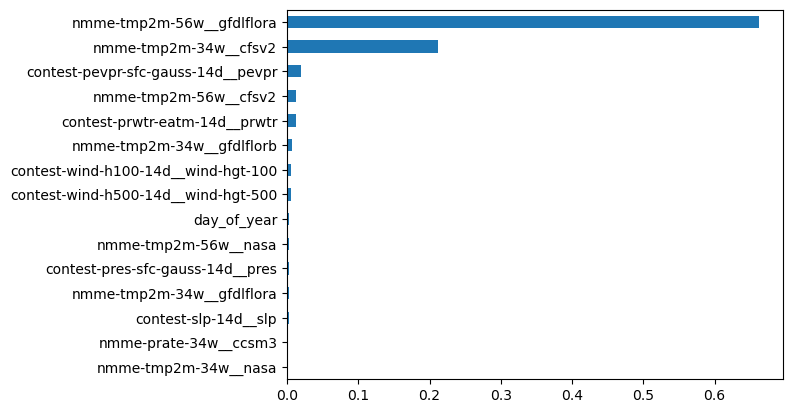

In [ ]:
feature_importance = pd.Series(rf_model.feature_importances_, index = X_train.columns)
feature_importance.nlargest(15).plot(kind='barh').invert_yaxis()

# For Submission

### Feature Engineering

In [ ]:
test['climateregions__climateregion'] = le.transform(test['climateregions__climateregion'])                                                                
print('Test set: ', test['climateregions__climateregion'].unique())

Test set:  [ 0  4  1  3  2  6  7  5  9 12 10  8 11 13 14]


#### Assign loc_group to test data base on its lat and lon. Assignment is the same as for the training data.

In [ ]:
#loc_temp = train_reduce.groupby(['lat', 'lon']).mean()['loc_group'].reset_index()
regions_dict = {}

for row in loc_temp.iterrows():
    key = str(row[1].lat) + '_' + str(row[1].lon)
    regions_dict[key] = row[1].loc_group
    
test['regions_key'] = test.apply(lambda x: str(x.lat) + '_' + str(x.lon),
                                axis=1)
test['loc_group'] = test.regions_key.apply(lambda x: regions_dict.get(x, -1))

In [ ]:
build_date_features(test)
add_season(test)
encode_cyclical(test)
conv_numeric(test, ['year', 'day_of_year', 'month', 'season'])

In [ ]:
test.isnull().sum().sum()

0

In [ ]:
test = test.drop(columns = ['startdate', 'index', 'regions_key'])

### For PCA model

In [ ]:
test_pca = pca.transform(test)

### For RandomForestRegressor, XGBoost, and Light GBM models

In [ ]:
test_std = scaler.transform(test)

In [ ]:
print(test_std.shape)
print(X_train_std.shape)

(31354, 254)
(352604, 254)


### For ARIMA model

In [ ]:
# Predicting all the features, including 254 independent features and the target feature

prediction = VAR_model_fit.forecast(VAR_model_fit.endog, steps=len(test_std))

In [ ]:
pred = pd.DataFrame(prediction)
pred.shape

(31354, 255)

In [ ]:
cols = train_std.columns

#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=cols)

# The features for "prediction" are named 1, 2, 3. The features for "pred" are name the actual original feature names that carry meaning.
# Although we predicted all 255 features, we only need to output the target feature
for j in range(254,255):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

In [ ]:
# This confirms target feature is in the last column
print(pred[target].head())

print(pred.iloc[:, 254].head())

0    15.037806
1    14.468756
2    14.083538
3    13.830883
4    13.670941
Name: contest-tmp2m-14d__tmp2m, dtype: object
0    15.037806
1    14.468756
2    14.083538
3    13.830883
4    13.670941
Name: contest-tmp2m-14d__tmp2m, dtype: object


### Making prediction using different models and output to respective files

In [ ]:
submission_rf = pd.read_csv('sample_solution.csv')
submission_xgb = pd.read_csv('sample_solution.csv')
submission_lgb = pd.read_csv('sample_solution.csv')
submission_pca = pd.read_csv('sample_solution.csv')
submission_var = pd.read_csv('sample_solution.csv')

submission_rf[target] = rf_model.predict(test_std)
submission_xgb[target] = xgb_model.predict(test_std)
submission_lgb[target] = lgb_model.predict(test_std)
submission_pca[target] = lgbm_pca.predict(test_pca)
submission_var[target] = pred[target] # already predicted above

submission_rf.to_csv('submission_rf.csv', index=False) # set index to False to avoid issue in evaluation
submission_xgb.to_csv('submission_xgb.csv', index=False) 
submission_lgb.to_csv('submission_lgb.csv', index=False) 
submission_pca.to_csv('submission_pca.csv', index=False) 
submission_var.to_csv('submission_var.csv', index=False) 


/home/shart/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
